In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
tf.__version__

'2.2.0'

In [9]:
mnist = tf.keras.datasets.mnist #28x28 images of hand-written difits 0-9

In [10]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

# Scale('normalize') data

X_train = tf.keras.utils.normalize(X_train, axis =1)
X_test = tf.keras.utils.normalize(X_test, axis =1)

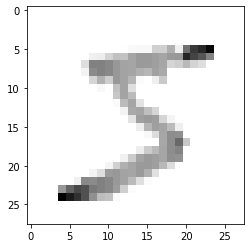

In [11]:
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

In [12]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
# 10 = Number of classifications
# softmax for prob distribution
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

# Adam - Default optimizer (StocastycGradientDescent could be passed too)
model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [13]:
model.fit(X_train,y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2658 - accuracy: 0.9234
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1096 - accuracy: 0.9661
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0755 - accuracy: 0.9760


In [14]:
val_loss, val_acc = model.evaluate(X_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 0s 797us/step - loss: 0.0862 - accuracy: 0.9726
0.0861813873052597 0.972599983215332


In [15]:
model.save('epic_num_reader.model ')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model /assets


In [16]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [17]:
# Predict always takes a list!!!
predictions = new_model.predict([X_test])

AttributeError: in user code:

    /opt/anaconda3/envs/Ironhack/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /opt/anaconda3/envs/Ironhack/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/envs/Ironhack/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/envs/Ironhack/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/envs/Ironhack/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1122 predict_step  **
        return self(x, training=False)
    /opt/anaconda3/envs/Ironhack/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /opt/anaconda3/envs/Ironhack/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:291 call
        outputs = layer(inputs, **kwargs)
    /opt/anaconda3/envs/Ironhack/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /opt/anaconda3/envs/Ironhack/lib/python3.7/site-packages/tensorflow/python/keras/layers/core.py:642 call
        input_shape = inputs.shape

    AttributeError: 'tuple' object has no attribute 'shape'
